In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

In [5]:
print(df.head())

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [8]:
print(df.describe())

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

In [9]:
print(df.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [10]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as needed
df.fillna(0, inplace=True)

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [11]:
# Convert data types if needed
df['iyear'] = df['iyear'].astype(int)

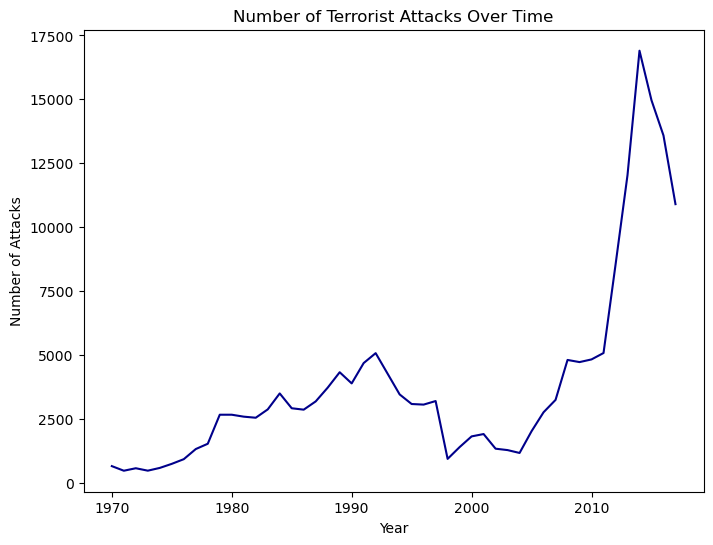

In [29]:
# Number of attacks per year
attacks_per_year = df['iyear'].value_counts().sort_index()

# Plotting the number of attacks per year
plt.figure(figsize=(8, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, color='darkblue')
plt.title('Number of Terrorist Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

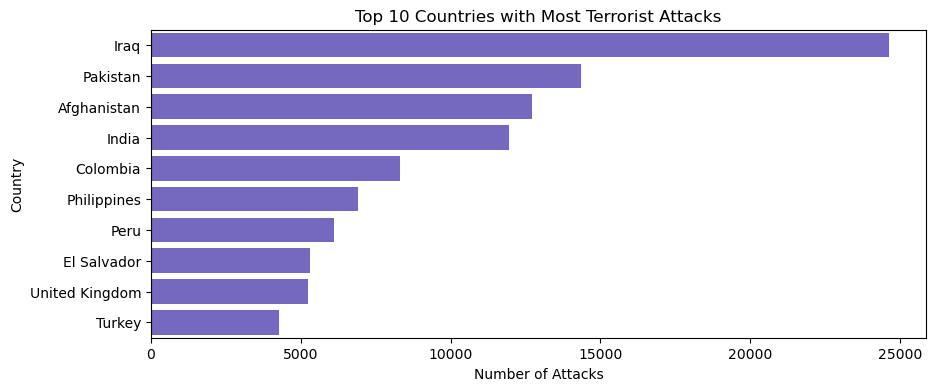

In [28]:
# Number of attacks per country
attacks_per_country = df['country_txt'].value_counts().head(10)

# Plotting the number of attacks per country
plt.figure(figsize=(10, 4))
sns.barplot(x=attacks_per_country.values, y=attacks_per_country.index, color='slateblue')
plt.title('Top 10 Countries with Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()


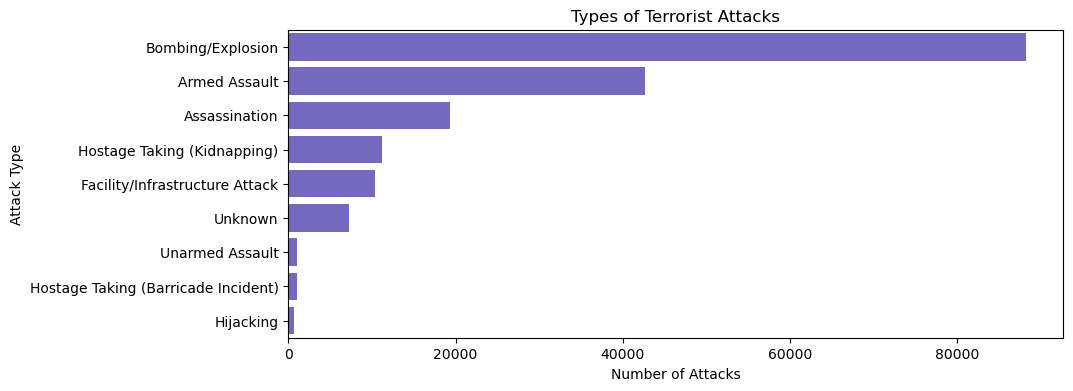

In [27]:
# Types of attacks
attack_types = df['attacktype1_txt'].value_counts()

# Plotting the types of attacks
plt.figure(figsize=(10, 4))
sns.barplot(x=attack_types.values, y=attack_types.index, color='slateblue')
plt.title('Types of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

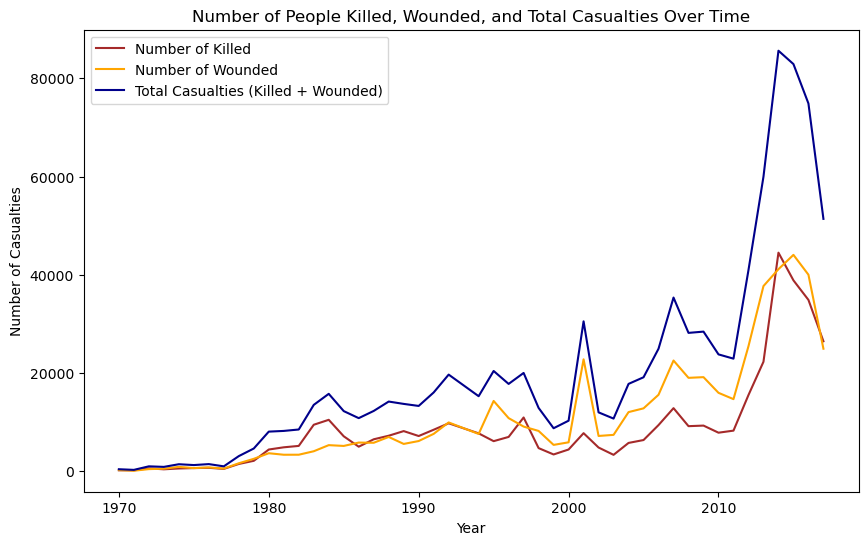

In [44]:
# Total casualties (killed + wounded)
df['casualties'] = df['nkill'] + df['nwound']

# Number of killed, wounded, and total casualties per year
killed_per_year = df.groupby('iyear')['nkill'].sum()
wounded_per_year = df.groupby('iyear')['nwound'].sum()
casualties_per_year = df.groupby('iyear')['casualties'].sum()

# Plotting killed, wounded, and total casualties per year
plt.figure(figsize=(10, 6))
sns.lineplot(x=killed_per_year.index, y=killed_per_year.values, color='brown', label='Number of Killed')
sns.lineplot(x=wounded_per_year.index, y=wounded_per_year.values, color='orange', label='Number of Wounded')
sns.lineplot(x=casualties_per_year.index, y=casualties_per_year.values, color='darkblue', label='Total Casualties (Killed + Wounded)')
plt.title('Number of People Killed, Wounded, and Total Casualties Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.legend()
plt.show()


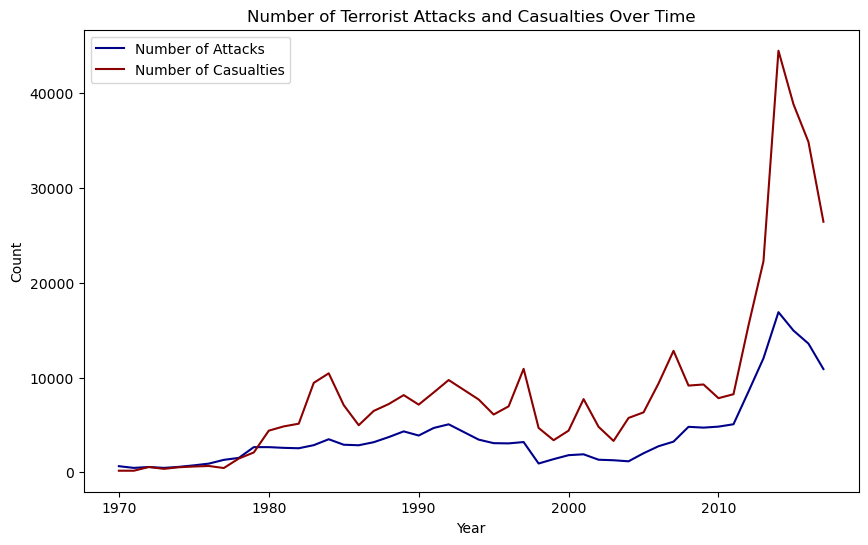

In [40]:
# Number of attacks per year
attacks_per_year = df['iyear'].value_counts().sort_index()

# Number of casualties per year
casualties_per_year = df.groupby('iyear')['nkill'].sum()

# Plotting the number of attacks and casualties per year
plt.figure(figsize=(10, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, color='darkblue', label='Number of Attacks')
sns.lineplot(x=casualties_per_year.index, y=casualties_per_year.values, color='darkred', label='Number of Casualties')
plt.title('Number of Terrorist Attacks and Casualties Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

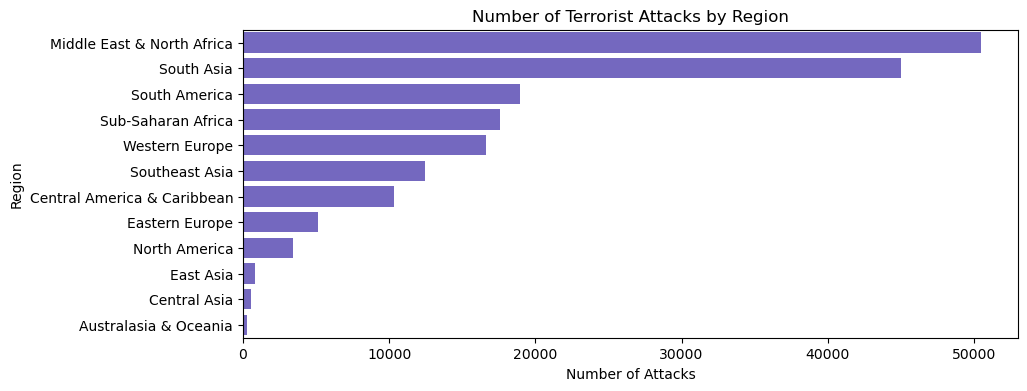

In [25]:
# Number of attacks per region
attacks_per_region = df['region_txt'].value_counts()

# Plotting the number of attacks per region
plt.figure(figsize=(10, 4))
sns.barplot(x=attacks_per_region.values, y=attacks_per_region.index, color='slateblue')
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()

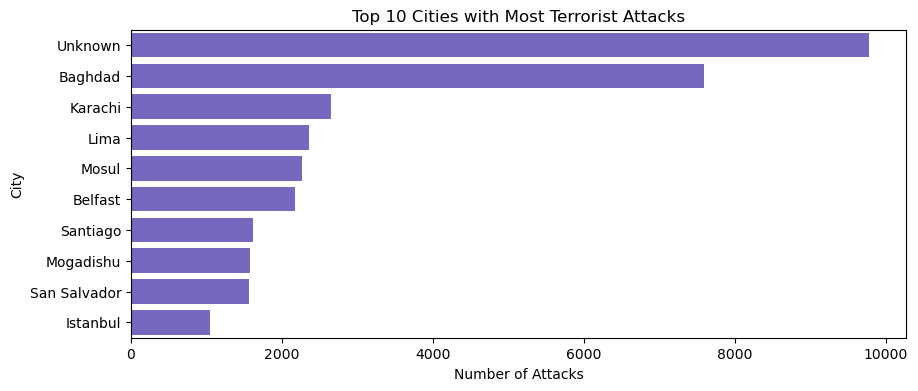

In [31]:
# Number of attacks per city
attacks_per_city = df['city'].value_counts().head(10)

# Plotting the number of attacks per city
plt.figure(figsize=(10, 4))
sns.barplot(x=attacks_per_city.values, y=attacks_per_city.index, color='slateblue')
plt.title('Top 10 Cities with Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('City')
plt.show()


Identify Key Terrorist Organizations:

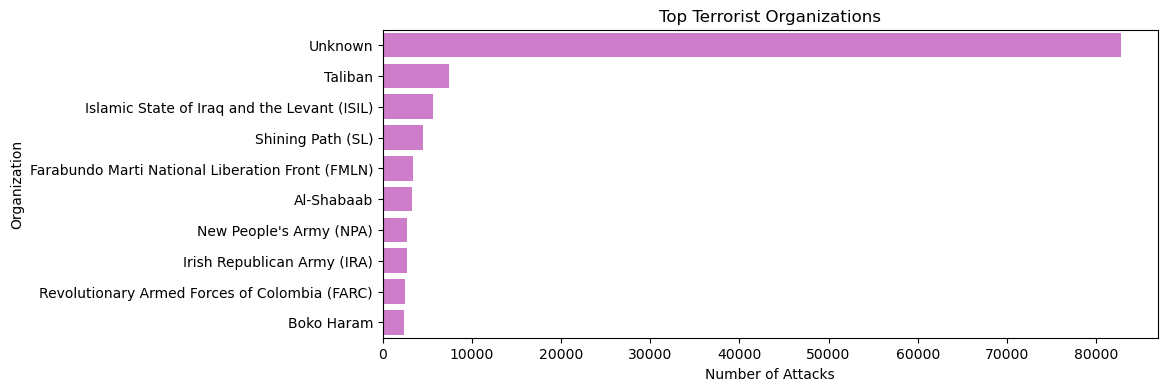

In [33]:
# Top terrorist organizations
top_groups = df['gname'].value_counts().head(10)

# Plotting top terrorist organizations
plt.figure(figsize=(10, 4))
sns.barplot(x=top_groups.values, y=top_groups.index,  color='orchid')
plt.title('Top Terrorist Organizations')
plt.xlabel('Number of Attacks')
plt.ylabel('Organization')
plt.show()

Analyze Attack Success Rate:

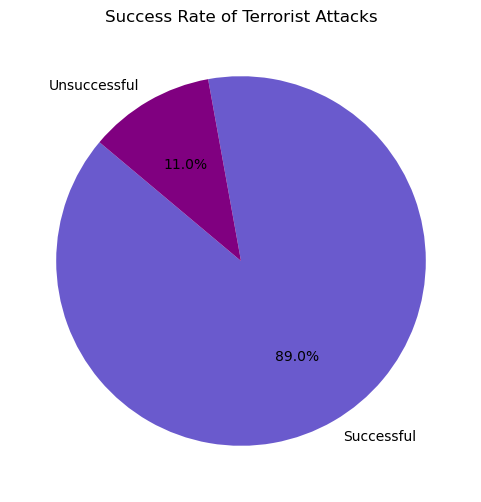

In [37]:
# Success rate of attacks
success_rate = df['success'].value_counts(normalize=True) * 100

# Custom colors for the pie chart
colors = ['slateblue', 'purple']

# Plotting success rate of attacks
plt.figure(figsize=(6, 6))
plt.pie(success_rate, labels=['Successful', 'Unsuccessful'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Success Rate of Terrorist Attacks')
plt.show()
